<a href="https://colab.research.google.com/github/Gus-1003/DataScience/blob/main/An%C3%A1lise_Dataset_REMS_Mars/Av3_Ci%C3%AAncia_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto - 3ª Unidade - Fundamentos e Técnicas em ciências de Dados

## Cap1: Contexto da Atividade

Instituição: Escola Agricula de Jundiaí - EAJ - Macaiba - RN

Vinculo: Universidade Federal do Rio Grande do Norte - UFRN

Curso: Analise e Desenvolvimento de Sistemas - TADS

Docente: Laura Emmanuela

Discentes: Gustavo Maciel; Oseias Batista;

Data da Entrega: 11/02/2022

Tema: ‎
*   Estação de Monitoramento Ambiental MARS Rover ‎
  *   ‎Dados meteorológicos e ambientais para o planeta Marte

Fonte: https://www.kaggle.com/deepcontractor/mars-rover-environmental-monitoring-station







## Cap2: Import das Bibliotecas e Carregar Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
Dataframe = pd.read_csv('https://raw.githubusercontent.com/Gus-1003/DataScience/main/An%C3%A1lise_Dataset_REMS_Mars/REMS_Mars_Dataset.csv')

## Cap3: Analise Exploratoria:

***Objetivo:*** Conhecer s dados antes de aplicar qualquer transformação neles, ou seja, antes de tirar qualquer conclusão;

Tipos de tecnicas:
*   Quantitaivas;
  *   Frequência - Atributo assume um mesmo valor;
  *   Localização - Pontos de referência;
      *   Atributos Numericos - Média - posição equidistante dos extremos;
      *   Descio padrão;
      *   Atributos Categoricos - Moda - Valor encontrado com maior frequência;
  *   Dispersão / espalhamento;
      *   Descio padrão;
      *   Intervalo; 

*   Visuais;
  *  Diagrama de Disperção - Relacionar variáveis numéricas;
  *  Diagrama de Caixa
  *  Histograma
  *  Nuvem de Palavras

*   Aprendizagem de Maquina
  *  Supervisionado;
  *  Não - Supervisionado;



In [35]:
Dataframe

,earth_date_time,mars_date_time,sol_number,max_ground_temp(°C),min_ground_temp(°C),max_air_temp(°C),min_air_temp(°C),mean_pressure(Pa),wind_speed(m/h),humidity(%),sunrise,sunset,UV_Radiation,weather
0,"Earth, 2022-01-26 UTC","Mars, Month 6 - LS 163°",Sol 3368,-3,-71,10,-84,707,Value not available,Value not available,05:25,17:20,moderate,Sunny
1,"Earth, 2022-01-25 UTC","Mars, Month 6 - LS 163°",Sol 3367,-3,-72,10,-87,707,Value not available,Value not available,05:25,17:20,moderate,Sunny
2,"Earth, 2022-01-24 UTC","Mars, Month 6 - LS 162°",Sol 3366,-4,-70,8,-81,708,Value not available,Value not available,05:25,17:21,moderate,Sunny
3,"Earth, 2022-01-23 UTC","Mars, Month 6 - LS 162°",Sol 3365,-6,-70,9,-91,707,Value not available,Value not available,05:26,17:21,moderate,Sunny
4,"Earth, 2022-01-22 UTC","Mars, Month 6 - LS 161°",Sol 3364,-7,-71,8,-92,708,Value not available,Value not available,05:26,17:21,moderate,Sunny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,"Earth, 2012-08-18 UTC","Mars, Month 6 - LS 156°",Sol 12,-18,-76,8,-82,741,Value not available,Value not available,05:28,17:21,very_high,Sunny
3193,"Earth, 2012-08-17 UTC","Mars, Month 6 - LS 156°",Sol 11,-11,-76,9,-83,740,Value not available,Value not available,05:28,17:21,very_high,Sunny
3194,"Earth, 2012-08-16 UTC","Mars, Month 6 - LS 155°",Sol 10,-16,-75,8,-83,739,Value not available,Value not available,05:28,17:22,very_high,Sunny
3195,"Earth, 2012-08-15 UTC","Mars, Month 6 - LS 155°",Sol 9,Value not available,Value not available,Value not available,Value not available,Value not available,Value not available,Value not available,05:28,17:22,NaN,Sunny


### Limpeza das linhas:

In [82]:
# Remove as linhas que possuem o termo "Value not available"
Dataframe.drop(Dataframe.index[Dataframe['min_ground_temp(°C)'] == 'Value not available'], inplace = True)
Dataframe.drop(Dataframe.index[Dataframe['max_ground_temp(°C)'] == 'Value not available'], inplace = True)
Dataframe.drop(Dataframe.index[Dataframe['min_air_temp(°C)'] == 'Value not available'], inplace = True)
Dataframe.drop(Dataframe.index[Dataframe['max_air_temp(°C)'] == 'Value not available'], inplace = True)
Dataframe.drop(Dataframe.index[Dataframe['mean_pressure(Pa)'] == 'Value not available'], inplace = True)

### Limpeza das Colunas:

In [83]:
# Remove as colunas que não são uteis
Dataframe = Dataframe.drop(columns=['wind_speed(m/h)'])
Dataframe = Dataframe.drop(columns=['humidity(%)'])
Dataframe = Dataframe.drop(columns=['weather'])

### Transformação: Strings -> Int´s

In [ ]:
# Tranforma as colunas de string para int
Dataframe['min_ground_temp(°C)'] = Dataframe['min_ground_temp(°C)'].astype(int)
Dataframe['max_ground_temp(°C)'] = Dataframe['max_ground_temp(°C)'].astype(int)
Dataframe['min_air_temp(°C)'] = Dataframe['min_air_temp(°C)'].astype(int)
Dataframe['max_air_temp(°C)'] = Dataframe['max_air_temp(°C)'].astype(int)
Dataframe['mean_pressure(Pa)'] = Dataframe['mean_pressure(Pa)'].astype(int)

### Novas coletas de infomações(Dataset)

In [85]:
#mostra tipo de dados das colunas 
Dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3168 entries, 0 to 3194
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   earth_date_time      3168 non-null   object
 1   mars_date_time       3168 non-null   object
 2   sol_number           3168 non-null   object
 3   max_ground_temp(°C)  3168 non-null   int64 
 4   min_ground_temp(°C)  3168 non-null   int64 
 5   max_air_temp(°C)     3168 non-null   int64 
 6   min_air_temp(°C)     3168 non-null   int64 
 7   mean_pressure(Pa)    3168 non-null   int64 
 8   sunrise              3168 non-null   object
 9   sunset               3168 non-null   object
 10  UV_Radiation         3168 non-null   object
dtypes: int64(5), object(6)
memory usage: 426.0+ KB


In [86]:
#fazendo referencia a uma coluna específica
Dataframe['UV_Radiation']

0        moderate
1        moderate
2        moderate
3        moderate
4        moderate
          ...    
3190    very_high
3191    very_high
3192    very_high
3193    very_high
3194    very_high
Name: UV_Radiation, Length: 3168, dtype: object

In [87]:
#fazendo referencia a algumas colunas
Dataframe[['sunrise', 'sunset']] #dois colchetes nesse caso

,sunrise,sunset
0,05:25,17:20
1,05:25,17:20
2,05:25,17:21
3,05:26,17:21
4,05:26,17:21
...,...,...
3190,05:27,17:21
3191,05:28,17:21
3192,05:28,17:21
3193,05:28,17:21


In [88]:
#verifica quantas amostras possuem valor NaN por coluna
Dataframe.isna().sum()

earth_date_time        0
mars_date_time         0
sol_number             0
max_ground_temp(°C)    0
min_ground_temp(°C)    0
max_air_temp(°C)       0
min_air_temp(°C)       0
mean_pressure(Pa)      0
sunrise                0
sunset                 0
UV_Radiation           0
dtype: int64

In [89]:
#mostra as 5 primeiras amostras
Dataframe.head()

,earth_date_time,mars_date_time,sol_number,max_ground_temp(°C),min_ground_temp(°C),max_air_temp(°C),min_air_temp(°C),mean_pressure(Pa),sunrise,sunset,UV_Radiation
0,"Earth, 2022-01-26 UTC","Mars, Month 6 - LS 163°",Sol 3368,-3,-71,10,-84,707,05:25,17:20,moderate
1,"Earth, 2022-01-25 UTC","Mars, Month 6 - LS 163°",Sol 3367,-3,-72,10,-87,707,05:25,17:20,moderate
2,"Earth, 2022-01-24 UTC","Mars, Month 6 - LS 162°",Sol 3366,-4,-70,8,-81,708,05:25,17:21,moderate
3,"Earth, 2022-01-23 UTC","Mars, Month 6 - LS 162°",Sol 3365,-6,-70,9,-91,707,05:26,17:21,moderate
4,"Earth, 2022-01-22 UTC","Mars, Month 6 - LS 161°",Sol 3364,-7,-71,8,-92,708,05:26,17:21,moderate


In [90]:
#mostra as 5 ultimas amostras
Dataframe.tail()

,earth_date_time,mars_date_time,sol_number,max_ground_temp(°C),min_ground_temp(°C),max_air_temp(°C),min_air_temp(°C),mean_pressure(Pa),sunrise,sunset,UV_Radiation
3190,"Earth, 2012-08-20 UTC","Mars, Month 6 - LS 157°",Sol 14,-16,-74,9,-82,740,05:27,17:21,very_high
3191,"Earth, 2012-08-19 UTC","Mars, Month 6 - LS 157°",Sol 13,-15,-74,8,-80,732,05:28,17:21,very_high
3192,"Earth, 2012-08-18 UTC","Mars, Month 6 - LS 156°",Sol 12,-18,-76,8,-82,741,05:28,17:21,very_high
3193,"Earth, 2012-08-17 UTC","Mars, Month 6 - LS 156°",Sol 11,-11,-76,9,-83,740,05:28,17:21,very_high
3194,"Earth, 2012-08-16 UTC","Mars, Month 6 - LS 155°",Sol 10,-16,-75,8,-83,739,05:28,17:22,very_high


In [91]:
#descrição estatística das colunas numéricas
Dataframe.describe()

,max_ground_temp(°C),min_ground_temp(°C),max_air_temp(°C),min_air_temp(°C),mean_pressure(Pa)
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,-13.204545,-75.015152,2.010732,-80.317551,828.796402
std,10.492084,5.529702,9.401705,8.845239,57.136301
min,-67.000000,-100.000000,-61.000000,-136.000000,702.000000
25%,-23.000000,-79.000000,-6.000000,-86.000000,785.000000
50%,-12.000000,-75.000000,3.000000,-80.000000,843.000000
75%,-4.000000,-71.000000,10.000000,-75.000000,873.000000
max,11.000000,-52.000000,24.000000,-8.000000,925.000000


### Tipos de valores recebidos


In [92]:
#mostra os valores únicos
Dataframe['UV_Radiation'].unique()

array(['moderate', 'low', 'high', 'very_high'], dtype=object)

### área de Gráficos - Testes de váriaveis


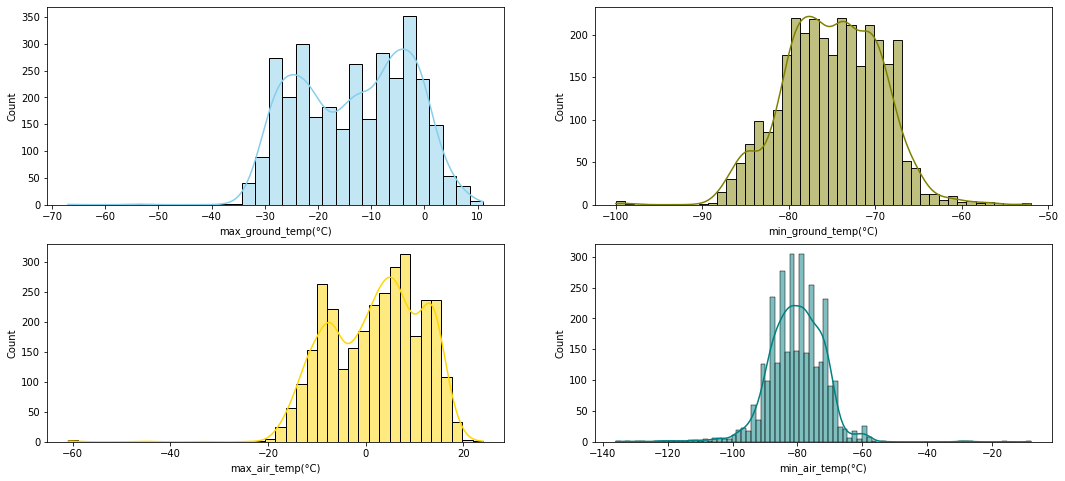

In [102]:
fig, axs = plt.subplots(2, 2, figsize=(18, 8))

sb.histplot(data=Dataframe, x='max_ground_temp(°C)', kde=True, color="skyblue", ax=axs[0, 0])
sb.histplot(data=Dataframe, x='min_ground_temp(°C)', kde=True, color="olive", ax=axs[0, 1])
sb.histplot(data=Dataframe, x='max_air_temp(°C)', kde=True, color="gold", ax=axs[1, 0])
sb.histplot(data=Dataframe, x='min_air_temp(°C)', kde=True, color="teal", ax=axs[1, 1])

plt.show()

## Cap4: Analise Explicita:

Introdução:
> Nessa analise temos que realçar os dados que estão explicitos nas tabelas e a partir de operações de ordenação e rotulagem os transformar em informações;

Ferramentas:
*   Filtros
*   Criações de colunas



In [ ]:
# Remove as linhas que possuem o termo "Value not available"
Dataframe.drop(Dataframe.index[Dataframe['min_ground_temp(°C)'] == 'Value not available'], inplace = True)
Dataframe.drop(Dataframe.index[Dataframe['max_ground_temp(°C)'] == 'Value not available'], inplace = True)
Dataframe.drop(Dataframe.index[Dataframe['min_air_temp(°C)'] == 'Value not available'], inplace = True)
Dataframe.drop(Dataframe.index[Dataframe['max_air_temp(°C)'] == 'Value not available'], inplace = True)
Dataframe.drop(Dataframe.index[Dataframe['mean_pressure(Pa)'] == 'Value not available'], inplace = True)

# Tranforma as colunas de string para int
Dataframe['min_ground_temp(°C)'] = Dataframe['min_ground_temp(°C)'].astype(int)
Dataframe['max_ground_temp(°C)'] = Dataframe['max_ground_temp(°C)'].astype(int)
Dataframe['min_air_temp(°C)'] = Dataframe['min_air_temp(°C)'].astype(int)
Dataframe['max_air_temp(°C)'] = Dataframe['max_air_temp(°C)'].astype(int)
Dataframe['mean_pressure(Pa)'] = Dataframe['mean_pressure(Pa)'].astype(int)

In [ ]:
# Remove as linhas que possuem o termo "Value not available"
Dataframe.drop(Dataframe.index[Dataframe['min_ground_temp(°C)'] == 'Value not available'], inplace = True)
Dataframe.drop(Dataframe.index[Dataframe['max_ground_temp(°C)'] == 'Value not available'], inplace = True)
Dataframe.drop(Dataframe.index[Dataframe['min_air_temp(°C)'] == 'Value not available'], inplace = True)
Dataframe.drop(Dataframe.index[Dataframe['max_air_temp(°C)'] == 'Value not available'], inplace = True)
Dataframe.drop(Dataframe.index[Dataframe['mean_pressure(Pa)'] == 'Value not available'], inplace = True)

# Tranforma as colunas de string para int
Dataframe['min_ground_temp(°C)'] = Dataframe['min_ground_temp(°C)'].astype(int)
Dataframe['max_ground_temp(°C)'] = Dataframe['max_ground_temp(°C)'].astype(int)
Dataframe['min_air_temp(°C)'] = Dataframe['min_air_temp(°C)'].astype(int)
Dataframe['max_air_temp(°C)'] = Dataframe['max_air_temp(°C)'].astype(int)
Dataframe['mean_pressure(Pa)'] = Dataframe['mean_pressure(Pa)'].astype(int)

In [ ]:
# Remove as linhas que possuem o termo "Value not available"
Dataframe.drop(Dataframe.index[Dataframe['min_ground_temp(°C)'] == 'Value not available'], inplace = True)
Dataframe.drop(Dataframe.index[Dataframe['max_ground_temp(°C)'] == 'Value not available'], inplace = True)
Dataframe.drop(Dataframe.index[Dataframe['min_air_temp(°C)'] == 'Value not available'], inplace = True)
Dataframe.drop(Dataframe.index[Dataframe['max_air_temp(°C)'] == 'Value not available'], inplace = True)
Dataframe.drop(Dataframe.index[Dataframe['mean_pressure(Pa)'] == 'Value not available'], inplace = True)

# Tranforma as colunas de string para int
Dataframe['min_ground_temp(°C)'] = Dataframe['min_ground_temp(°C)'].astype(int)
Dataframe['max_ground_temp(°C)'] = Dataframe['max_ground_temp(°C)'].astype(int)
Dataframe['min_air_temp(°C)'] = Dataframe['min_air_temp(°C)'].astype(int)
Dataframe['max_air_temp(°C)'] = Dataframe['max_air_temp(°C)'].astype(int)
Dataframe['mean_pressure(Pa)'] = Dataframe['mean_pressure(Pa)'].astype(int)

## Cap5: Gráficos

In [ ]:
saajkdbakjdbajdbakjdbak